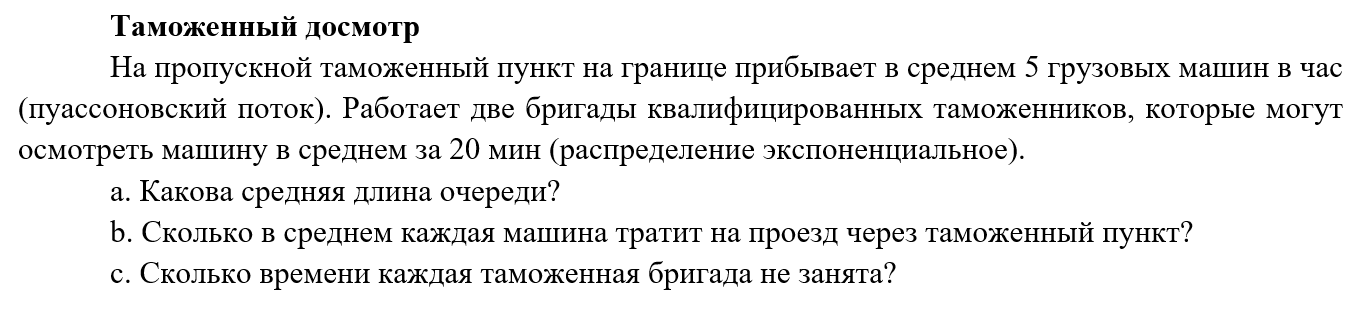

Эта система массового обслуживания:
* Двухканальная;
* С ожиданием;
* С упорядоченным обслуживанием.

In [ ]:
from scipy. stats import poisson

n = 100000

car_stream = poisson.rvs(mu=5, size=n)
car_stream

array([4, 6, 8, ..., 4, 5, 3])

In [ ]:
# from scipy. stats import expon

# car_inspection = expon.rvs(scale = 6 , size= 1000) # Две бригады могут обслужить 6 машин в час
# car_inspection

In [ ]:
from scipy. stats import expon

car_inspection_team_one = expon.rvs(scale = 3 , size= n) # Количество машин, которые обслужит первая бригада
car_inspection_team_one

array([0.96680591, 4.55251737, 4.15139029, ..., 5.53670454, 0.73481542,
       4.59378641])

In [ ]:
from scipy. stats import expon

car_inspection_team_two = expon.rvs(scale = 3 , size= n) # Количество машин, которые обслужит вторая бригада
car_inspection_team_two

array([ 1.80354136,  7.29107791, 12.10567277, ...,  2.31677642,
        0.5276225 ,  1.84294589])

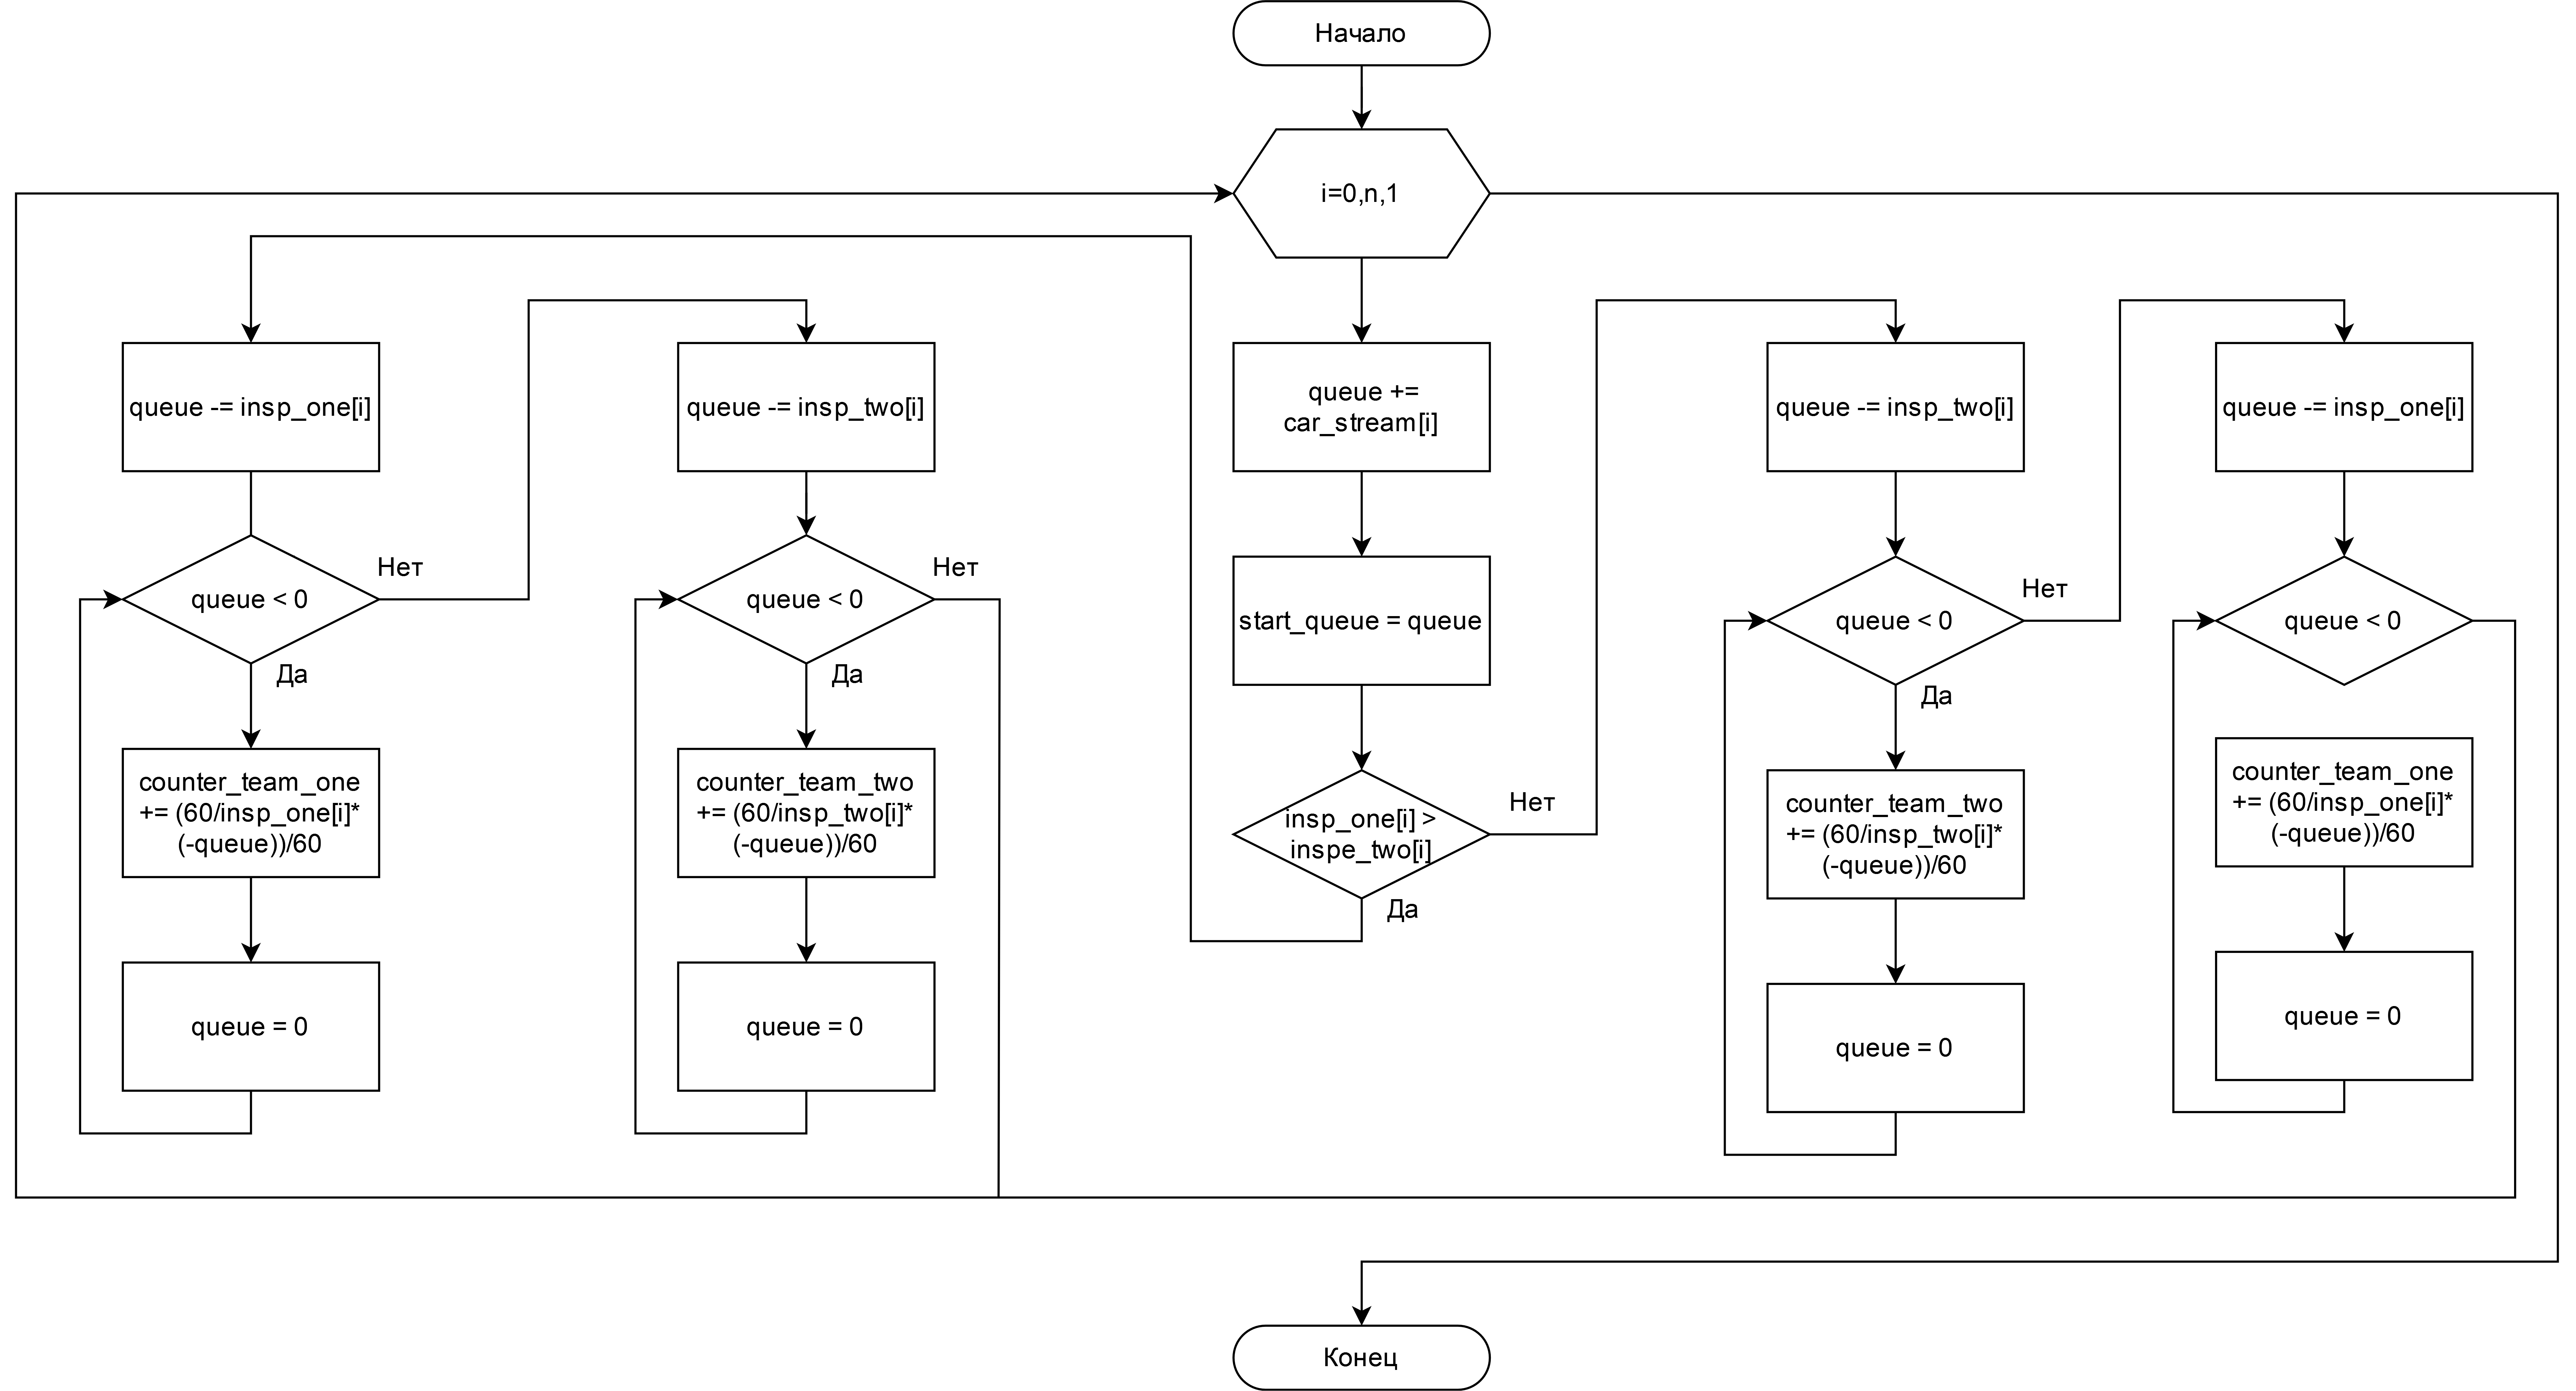

In [ ]:
import statistics
import random

queue = 0
queue_list = []

pass_counter_team_one = 0
pass_counter_team_two = 0

inspected_cars = []

for i in range(len(car_stream)):

    queue += car_stream[i]      # машины прибывшие в i час
    start_queue = queue

    if car_inspection_team_one[i] > car_inspection_team_two[i]: # меняем порядок назначения машин бригадам в зависимости от кол-ва машин которое может обслужить бригада в этот час

        queue -= car_inspection_team_one[i]  # вычитаем машины обслуженные в i час

        if (queue) < 0: # перехват отрицательной очереди
            # Узнаем сколько минут занимает обслуживание одного автомобиля в 1-й час у бригады и умножаем на машины обслужанные в минус
            pass_counter_team_one += (60/car_inspection_team_one[i]*(-queue))/60
            queue = 0
        else:
            queue -= car_inspection_team_two[i]  # вычитаем машины обслуженные в i час
            if (queue) < 0: # перехват отрицательной очереди
                # Узнаем сколько минут занимает обслуживание одного автомобиля в 2-й час у бригады и умножаем на машины обслужанные в минус
                pass_counter_team_two += (60/car_inspection_team_two[i]*(-queue))/60
                queue = 0

    else:

        queue -= car_inspection_team_two[i]  # вычитаем машины обслуженные в i час

        if (queue) < 0: # перехват отрицательной очереди
            # Узнаем сколько минут занимает обслуживание одного автомобиля в 2-й час у бригады и умножаем на машины обслужанные в минус
            pass_counter_team_two += (60/car_inspection_team_two[i]*(-queue))/60
            queue = 0
        else:
            queue -= car_inspection_team_one[i]  # вычитаем машины обслуженные в i час
            if (queue) < 0: # перехват отрицательной очереди
                # Узнаем сколько минут занимает обслуживание одного автомобиля в 1-й час у бригады и умножаем на машины обслужанные в минус
                pass_counter_team_one += (60/car_inspection_team_one[i]*(-queue))/60
                queue = 0

    inspected_cars.append(start_queue - queue) # число обслужанных машин в i час
    queue_list.append(queue)

print(f'Средняя длина очереди: {statistics.mean(queue_list)}')
print(f'Среднее число машин обслуженных за час: {statistics.fmean(inspected_cars)}')
print(f'Время которое в среднем тратит каждая машина на проезд таможенного поста: {60/statistics.fmean(inspected_cars)} минут')
print(f'Суммарные часы простоя обоих бригад: {pass_counter_team_one + pass_counter_team_two}')
print(f'Часы простоя первой бригады: {pass_counter_team_one}')
print(f'Часы простоя второй бригады: {pass_counter_team_two}')

Средняя длина очереди: 8.061181970071926
Среднее число машин обслуженных за час: 5.000541514137326
Время которое в среднем тратит каждая машина на проезд таможенного поста: 11.998700506809206 минут
Суммарные часы простоя обоих бригад: 10020.546954489779
Часы простоя первой бригады: 5012.648734646823
Часы простоя второй бригады: 5007.898219842956


# В качестве проверки представим две бригады как одну

In [ ]:
import numpy as np

car_inspection = np.add(car_inspection_team_one,car_inspection_team_two)

car_inspection

array([ 2.77034727, 11.84359528, 16.25706305, ...,  7.85348096,
        1.26243792,  6.43673231])

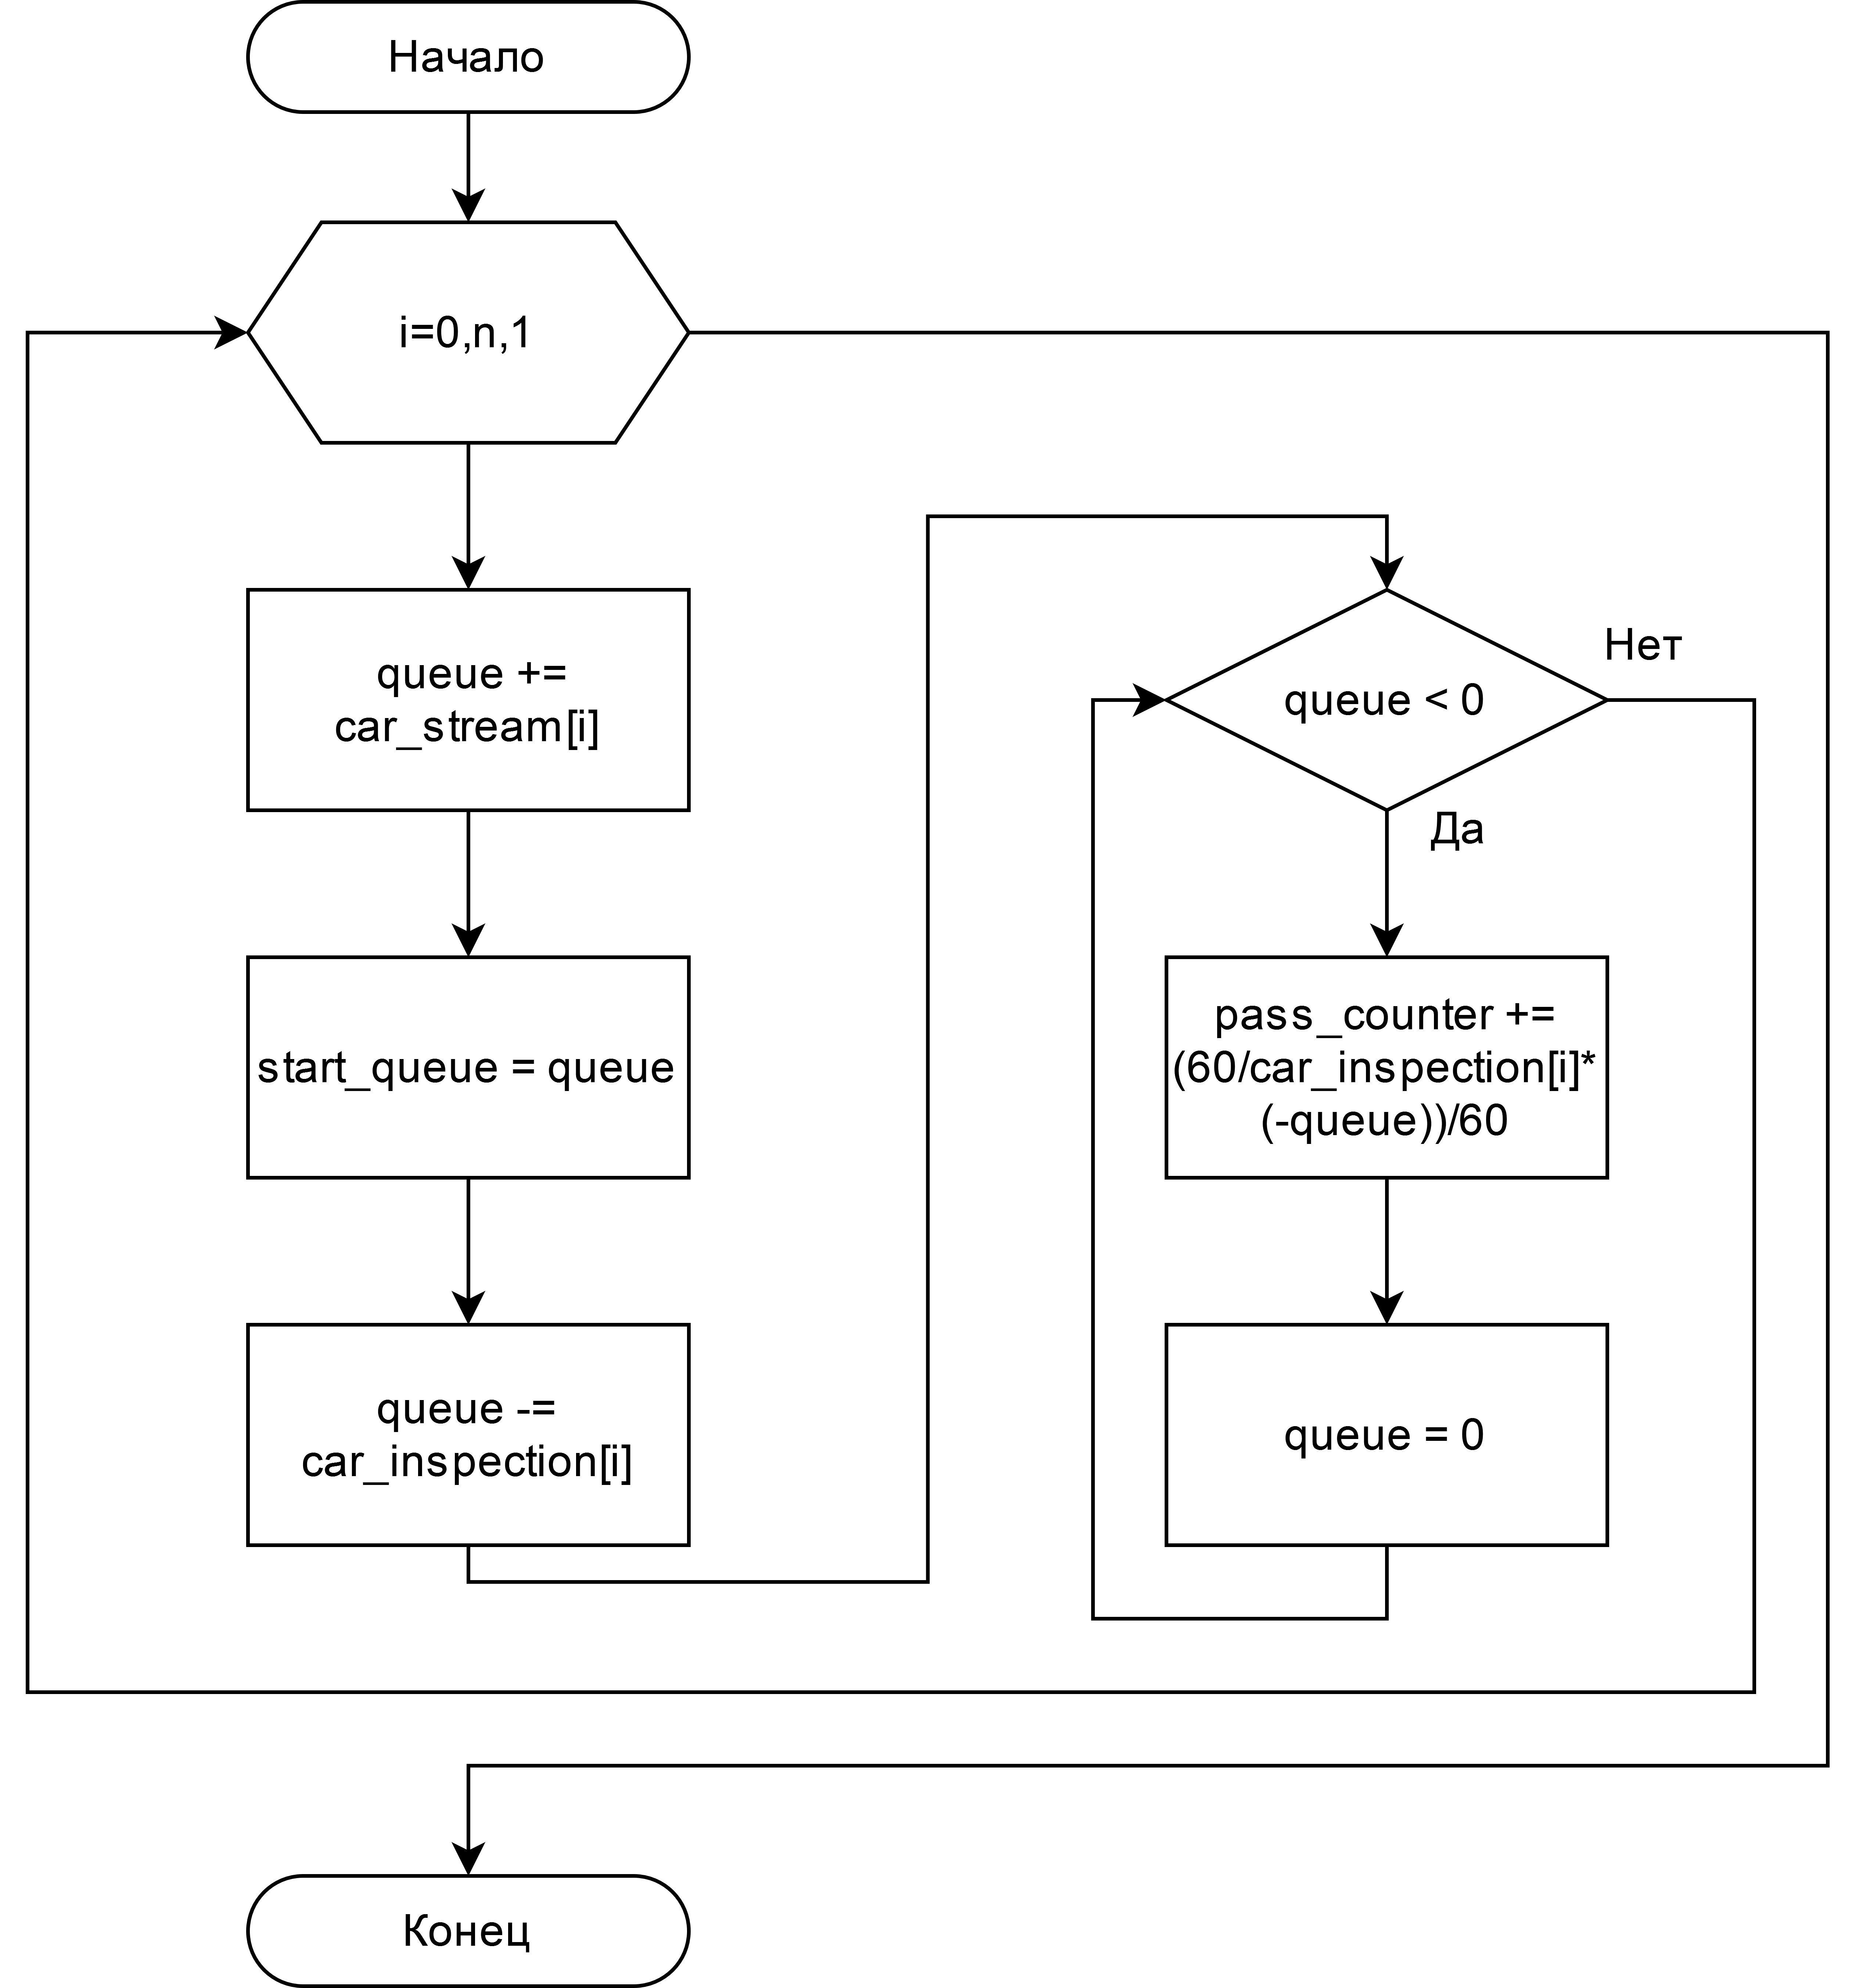

In [ ]:
import statistics

queue = 0
queue_list = []
pass_counter = 0
inspected_cars = []

for i in range(len(car_inspection)):

    queue += car_stream[i]      # машины прибывшие в i час

    start_queue = queue

    queue -= car_inspection[i]  # вычитаем машины обслуженные в i час

    if (queue) < 0: # перехват отрицательной очереди
        pass_counter += (60/car_inspection[i]*(-queue))/60 # узнаем количество времени которое инспекция потратила на "отрицательную" очередь
        # Узнаем сколько минут занимает обслуживание одного автомобиля в i-й час у бригады и умножаем на машины обслужанные в минус
        queue = 0

    inspected_cars.append(start_queue - queue) # число обслужанных машин в i час
    queue_list.append(queue)

print(f'Средняя длина очереди: {statistics.mean(queue_list)}')
print(f'Среднее число машин обслужанных за час: {statistics.fmean(inspected_cars)}')
print(f'Время которое в среднем тратит каждая машина на проезд таможенного поста: {60/statistics.fmean(inspected_cars)} минут')
print(f'Суммарные часы простоя обоих бригад: {pass_counter}')

Средняя длина очереди: 8.061181970071926
Среднее число машин обслужанных за час: 5.000541514137326
Время которое в среднем тратит каждая машина на проезд таможенного поста: 11.998700506809206 минут
Суммарные часы простоя обоих бригад: 9531.996848789784
